## Uczenie maszynowe – zastosowania
# 2. Regresja liniowa

## 2.1. Funkcja kosztu

### Zadanie
Znając $x$ – ludność miasta (w dziesiątkach tysięcy mieszkańców),
należy przewidzieć $y$ – dochód firmy transportowej (w dziesiątkach tysięcy dolarów).

(Dane pochodzą z kursu „Machine Learning”, Andrew Ng, Coursera).

In [2]:
# Przydatne importy

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = "svg"

from IPython.display import display, Math, Latex

### Wczytanie danych

In [5]:
data = pd.read_csv("data01_train.csv", names=["x", "y"])
print(data[:10])

        x        y
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233
5  8.3829  11.8860
6  7.4764   4.3483
7  8.5781  12.0000
8  6.4862   6.5987
9  5.0546   3.8166


In [6]:
x = data[["x"]].to_numpy().flatten()
y = data[["y"]].to_numpy().flatten()
print(x)

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077]


### Hipoteza i parametry modelu

Jak przewidzieć $y$ na podstawie danego $x$? W celu odpowiedzi na to pytanie będziemy starać się znaleźć taką funkcję $h(x)$, która będzie najlepiej obrazować zależność między $x$ a $y$, tj. $y \sim h(x)$.

Zacznijmy od najprostszego przypadku, kiedy $h(x)$ jest po prostu funkcją liniową.

Ogólny wzór funkcji liniowej to
$$ h(x) = a \, x + b $$

Pamiętajmy jednak, że współczynniki $a$ i $b$ nie są w tej chwili dane z góry – naszym zadaniem właśnie będzie znalezienie takich ich wartości, żeby $h(x)$ było „możliwie jak najbliżej” $y$ (co właściwie oznacza to sformułowanie, wyjaśnię potem).

Poszukiwaną funkcję $h$ będziemy nazywać **funkcją hipotezy**, a jej współczynniki – **parametrami modelu**.

W teorii uczenia maszynowego parametry modelu oznacza się na ogół grecką literą $\theta$ z odpowiednimi indeksami, dlatego powyższy wzór opisujący liniową funkcję hipotezy zapiszemy jako
$$ h(x) = \theta_0 + \theta_1 x $$

**Parametry modelu** tworzą wektor, który oznaczymy po prostu przez $\theta$:

$$ \theta = \left[\begin{array}{c}\theta_0\\ \theta_1\end{array}\right] $$

Żeby podkreślić fakt, że funkcja hipotezy zależy od parametrów modelu, będziemy pisać $h_\theta$ zamiast $h$:

$$ h_{\theta}(x) = \theta_0 + \theta_1 x $$

Przyjrzyjmy się teraz, jak wyglądają dane, które mamy modelować:

Na poniższym wykresie możesz spróbować ręcznie dopasować parametry modelu $\theta_0$ i $\theta_1$ tak, aby jak najlepiej modelowały zależność między $x$ a $y$:

In [7]:
# Funkcje rysujące wykres kropkowy oraz prostą regresyjną

def regdots(x, y):    
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter(x, y, c='r', s=50, label='Dane')
    
    ax.set_xlabel(u'Wielkość miejscowości [dzies. tys. mieszk.]')
    ax.set_ylabel(u'Dochód firmy [dzies. tys. dolarów]')
    ax.margins(.05, .05)
    plt.ylim(min(y) - 1, max(y) + 1)
    plt.xlim(min(x) - 1, max(x) + 1)
    return fig

def regline(fig, fun, theta, x):
    ax = fig.axes[0]
    x0, x1 = min(x), max(x)
    X = [x0, x1]
    Y = [fun(theta, x) for x in X]
    ax.plot(X, Y, linewidth='2',
            label=(r'$y={theta0}{op}{theta1}x$'.format(
                theta0=theta[0],
                theta1=(theta[1] if theta[1] >= 0 else -theta[1]),
                op='+' if theta[1] >= 0 else '-')))

def legend(fig):
    ax = fig.axes[0]
    handles, labels = ax.get_legend_handles_labels()
    # try-except block is a fix for a bug in Poly3DCollection
    try:
        fig.legend(handles, labels, fontsize='15', loc='lower right')
    except AttributeError:
        pass

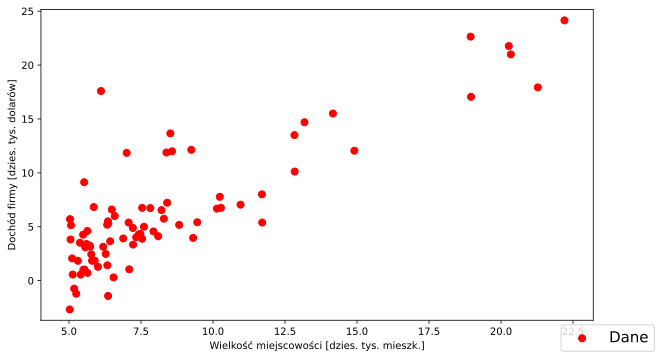

In [8]:
fig = regdots(x,y)
legend(fig)

In [9]:
# Hipoteza: funkcja liniowa jednej zmiennej

def h(theta, x):
    return theta[0] + theta[1] * x

In [10]:
# Przygotowanie interaktywnego wykresu

sliderTheta01 = widgets.FloatSlider(min=-10, max=10, step=0.1, value=0, description=r'$\theta_0$', width=300)
sliderTheta11 = widgets.FloatSlider(min=-5, max=5, step=0.1, value=0, description=r'$\theta_1$', width=300)

def slide1(theta0, theta1):
    fig = regdots(x, y)
    regline(fig, h, [theta0, theta1], x)
    legend(fig)

In [11]:
widgets.interact_manual(slide1, theta0=sliderTheta01, theta1=sliderTheta11)

interactive(children=(FloatSlider(value=0.0, description='$\\theta_0$', max=10.0, min=-10.0), FloatSlider(valu…

<function __main__.slide1(theta0, theta1)>

Skąd wiadomo, że przewidywania modelu (wartości funkcji $h(x)$) zgadzaja się z obserwacjami (wartości $y$)?

Aby to zmierzyć wprowadzimy pojęcie funkcji kosztu.

### Funkcja kosztu

Funkcję kosztu zdefiniujemy w taki sposób, żeby odzwierciedlała ona różnicę między przewidywaniami modelu a obserwacjami.

Jedną z możliwosci jest zdefiniowanie funkcji kosztu jako wartość **błędu średniokwadratowego** (metoda najmniejszych kwadratów, *mean-square error, MSE*).

My zdefiniujemy funkcję kosztu jako *połowę* błędu średniokwadratowego w celu ułatwienia późniejszych obliczeń (obliczenie pochodnej funkcji kosztu w dalszej części wykładu). Możemy tak zrobić, ponieważ $\frac{1}{2}$ jest stałą, a pomnożenie przez stałą nie wpływa na przebieg zmienności funkcji.

$$ J(\theta) \, = \, \frac{1}{2m} \sum_{i = 1}^{m} \left( h_{\theta} \left( x^{(i)} \right) - y^{(i)} \right) ^2 $$

gdzie $m$ jest liczbą wszystkich przykładów (obserwacji), czyli wielkością zbioru danych uczących.

W powyższym wzorze sumujemy kwadraty różnic między przewidywaniami modelu ($h_\theta \left( x^{(i)} \right)$) a obserwacjami ($y^{(i)}$) po wszystkich przykładach $i$.

Teraz nasze zadanie sprowadza się do tego, że będziemy szukać takich parametrów $\theta = \left[\begin{array}{c}\theta_0\\ \theta_1\end{array}\right]$, które minimalizują fukcję kosztu $J(\theta)$:

$$ \hat\theta = \mathop{\arg\min}_{\theta} J(\theta) $$

$$ \theta \in \mathbb{R}^2, \quad J \colon \mathbb{R}^2 \to \mathbb{R} $$

Proszę zwrócić uwagę, że dziedziną funkcji kosztu jest zbiór wszystkich możliwych wartości parametrów $\theta$.

$$ J(\theta_0, \theta_1) \, = \, \frac{1}{2m} \sum_{i = 1}^{m} \left( \theta_0 + \theta_1 x^{(i)} - y^{(i)} \right) ^2 $$

In [12]:
def J(h, theta, x, y):
    """Funkcja kosztu"""
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i])**2 for i in range(m))

In [13]:
# Oblicz wartość funkcji kosztu i pokaż na wykresie

def regline2(fig, fun, theta, xx, yy):
    """Rysuj regresję liniową"""
    ax = fig.axes[0]
    x0, x1 = min(xx), max(xx)
    X = [x0, x1]
    Y = [fun(theta, x) for x in X]
    cost = J(fun, theta, xx, yy)
    ax.plot(X, Y, linewidth="2", 
            label=(r'$y={theta0}{op}{theta1}x, \; J(\theta)={cost:.3}$'.format(
                theta0=theta[0],
                theta1=(theta[1] if theta[1] >= 0 else -theta[1]),
                op='+' if theta[1] >= 0 else '-',
                cost=str(cost))))

sliderTheta02 = widgets.FloatSlider(min=-10, max=10, step=0.1, value=0, description=r'$\theta_0$', width=300)
sliderTheta12 = widgets.FloatSlider(min=-5, max=5, step=0.1, value=0, description=r'$\theta_1$', width=300)

def slide2(theta0, theta1):
    fig = regdots(x, y)
    regline2(fig, h, [theta0, theta1], x, y)
    legend(fig)

Poniższy interaktywny wykres pokazuje wartość funkcji kosztu $J(\theta)$. Czy teraz łatwiej jest dobrać parametry modelu?

In [14]:
widgets.interact_manual(slide2, theta0=sliderTheta02, theta1=sliderTheta12)

interactive(children=(FloatSlider(value=0.0, description='$\\theta_0$', max=10.0, min=-10.0), FloatSlider(valu…

<function __main__.slide2(theta0, theta1)>

### Funkcja kosztu jako funkcja zmiennej $\theta$

Funkcja kosztu zdefiniowana jako MSE jest funkcją zmiennej wektorowej $\theta$, czyli funkcją dwóch zmiennych rzeczywistych: $\theta_0$ i $\theta_1$.
    
Zobaczmy, jak wygląda jej wykres.

In [15]:
# Wykres funkcji kosztu dla ustalonego theta_1=1.0

def costfun(fun, x, y):
    return lambda theta: J(fun, theta, x, y)

def costplot(hypothesis, x, y, theta1=1.0):
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$J(\theta)$')
    j = costfun(hypothesis, x, y)
    fun = lambda theta0: j([theta0, theta1])
    X = np.arange(-10, 10, 0.1)
    Y = [fun(x) for x in X]
    ax.plot(X, Y, linewidth='2', label=(r'$J(\theta_0, {theta1})$'.format(theta1=theta1)))
    return fig

def slide3(theta1):
    fig = costplot(h, x, y, theta1)
    legend(fig)

sliderTheta13 = widgets.FloatSlider(min=-5, max=5, step=0.1, value=1.0, description=r'$\theta_1$', width=300)

In [16]:
widgets.interact_manual(slide3, theta1=sliderTheta13)

interactive(children=(FloatSlider(value=1.0, description='$\\theta_1$', max=5.0, min=-5.0), Button(description…

<function __main__.slide3(theta1)>

In [17]:
# Wykres funkcji kosztu względem theta_0 i theta_1

from mpl_toolkits.mplot3d import Axes3D
import pylab

%matplotlib inline

def costplot3d(hypothesis, x, y, show_gradient=False):
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111, projection='3d')
    fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_zlabel(r'$J(\theta)$')
    
    j = lambda theta0, theta1: costfun(hypothesis, x, y)([theta0, theta1])
    X = np.arange(-10, 10.1, 0.1)
    Y = np.arange(-1, 4.1, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = np.array([[J(hypothesis, [theta0, theta1], x, y) 
                    for theta0, theta1 in zip(xRow, yRow)] 
                   for xRow, yRow in zip(X, Y)])
    
    ax.plot_surface(X, Y, Z, rstride=2, cstride=8, linewidth=0.5,
                    alpha=0.5, cmap='jet', zorder=0,
                    label=r"$J(\theta)$")
    ax.view_init(elev=20., azim=-150)

    ax.set_xlim3d(-10, 10);
    ax.set_ylim3d(-1, 4);
    ax.set_zlim3d(-100, 800);

    N = range(0, 800, 20)
    plt.contour(X, Y, Z, N, zdir='z', offset=-100, cmap='coolwarm', alpha=1)
    
    ax.plot([-3.89578088] * 2,
            [ 1.19303364] * 2,
            [-100, 4.47697137598], 
            color='red', alpha=1, linewidth=1.3, zorder=100, linestyle='dashed',
            label=r'minimum: $J(-3.90, 1.19) = 4.48$')
    ax.scatter([-3.89578088] * 2,
               [ 1.19303364] * 2,
               [-100, 4.47697137598], 
               c='r', s=80, marker='x', alpha=1, linewidth=1.3, zorder=100, 
               label=r'minimum: $J(-3.90, 1.19) = 4.48$')
    
    if show_gradient:
        ax.plot([3.0, 1.1],
                [3.0, 2.4],
                [263.0, 125.0], 
                color='green', alpha=1, linewidth=1.3, zorder=100)
        ax.scatter([3.0],
                   [3.0],
                   [263.0], 
                   c='g', s=30, marker='D', alpha=1, linewidth=1.3, zorder=100)

    ax.margins(0,0,0)
    fig.tight_layout()

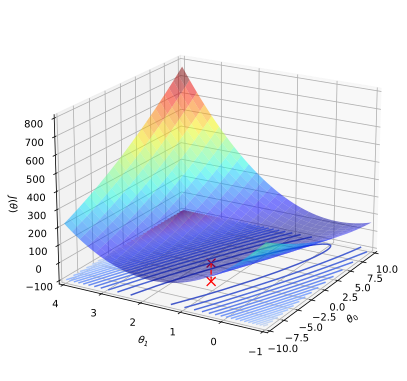

In [18]:
costplot3d(h, x, y)

Na powyższym wykresie poszukiwane minimum funkcji kosztu oznaczone jest czerwonym krzyżykiem.

Możemy też zobaczyć rzut powyższego trójwymiarowego wykresu na płaszczyznę $(\theta_0, \theta_1)$ poniżej:

In [19]:
def costplot2d(hypothesis, x, y, gradient_values=[], nohead=False):
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    
    j = lambda theta0, theta1: costfun(hypothesis, x, y)([theta0, theta1])
    X = np.arange(-10, 10.1, 0.1)
    Y = np.arange(-1, 4.1, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = np.array([[J(hypothesis, [theta0, theta1], x, y) 
                    for theta0, theta1 in zip(xRow, yRow)] 
                   for xRow, yRow in zip(X, Y)])
    
    N = range(0, 800, 20)
    plt.contour(X, Y, Z, N, cmap='coolwarm', alpha=1)

    ax.scatter([-3.89578088], [1.19303364], c='r', s=80, marker='x',
               label=r'minimum: $J(-3.90, 1.19) = 4.48$')
    
    if len(gradient_values) > 0:
        prev_theta = gradient_values[0][1]
        ax.scatter([prev_theta[0]], [prev_theta[1]],
                   c='g', s=30, marker='D', zorder=100)
        for cost, theta in gradient_values[1:]:
            dtheta = [theta[0] - prev_theta[0], theta[1] - prev_theta[1]]
            ax.arrow(prev_theta[0], prev_theta[1], dtheta[0], dtheta[1], 
                     color='green', 
                     head_width=(0.0 if nohead else 0.1), 
                     head_length=(0.0 if nohead else 0.2),
                     zorder=100)
            prev_theta = theta
    
    return fig

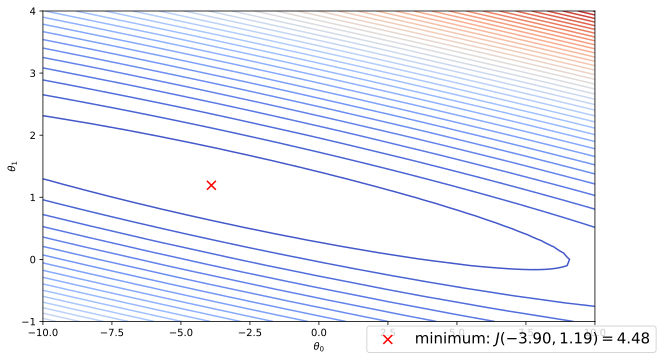

In [19]:
fig = costplot2d(h, x, y)
legend(fig)

### Cechy funkcji kosztu
* $J(\theta)$ jest funkcją wypukłą
* $J(\theta)$ posiada tylko jedno minimum lokalne

## 2.2. Metoda gradientu prostego

### Metoda gradientu prostego
Metoda znajdowania minimów lokalnych.

Idea:
 * Zacznijmy od dowolnego $\theta$.
 * Zmieniajmy powoli $\theta$ tak, aby zmniejszać $J(\theta)$, aż w końcu znajdziemy minimum.

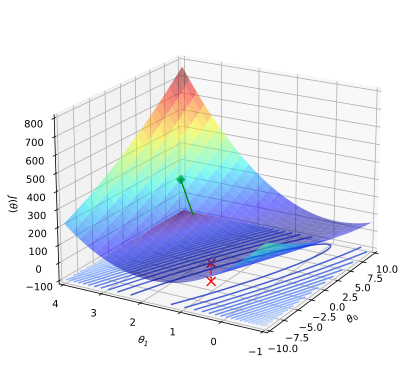

In [20]:
costplot3d(h, x, y, show_gradient=True)

In [25]:
# Przykładowe wartości kolejnych przybliżeń (sztuczne)

gv = [[_, [3.0, 3.0]], [_, [2.6, 2.4]], [_, [2.2, 2.0]], [_, [1.6, 1.6]], [_, [0.4, 1.2]], [_, [0.0, 1.2]]] # sam sobie dodalem

# Przygotowanie interaktywnego wykresu

sliderSteps1 = widgets.IntSlider(min=0, max=4, step=1, value=0, description='kroki', width=300)

def slide4(steps):
    costplot2d(h, x, y, gradient_values=gv[:steps+1])

In [26]:
widgets.interact(slide4, steps=sliderSteps1)

interactive(children=(IntSlider(value=0, description='kroki', max=4), Output()), _dom_classes=('widget-interac…

<function __main__.slide4(steps)>

### Metoda gradientu prostego
W każdym kroku będziemy aktualizować parametry $\theta_j$:

$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) \quad \mbox{ dla każdego } j $$

Współczynnik $\alpha$ nazywamy **długością kroku** lub **współczynnikiem szybkości uczenia** (*learning rate*).

$$ \begin{array}{rcl}
\dfrac{\partial}{\partial \theta_j} J(\theta)
 & = & \dfrac{\partial}{\partial \theta_j} \dfrac{1}{2m} \displaystyle\sum_{i = 1}^{m} \left( h_{\theta} \left( x^{(i)} \right) - y^{(i)} \right) ^2 \\
 & = & 2 \cdot \dfrac{1}{2m} \displaystyle\sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) \cdot \dfrac{\partial}{\partial\theta_j} \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) \\
 & = & \dfrac{1}{m}\displaystyle\sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) \cdot \dfrac{\partial}{\partial\theta_j} \left( \displaystyle\sum_{i=0}^n \theta_i x_i^{(i)} - y^{(i)} \right)\\
 & = & \dfrac{1}{m}\displaystyle\sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) -y^{(i)} \right) x_j^{(i)} \\
\end{array} $$

Czyli dla regresji liniowej jednej zmiennej:

$$ h_\theta(x) = \theta_0 + \theta_1x $$

w każdym kroku będziemy aktualizować:

$$
\begin{array}{rcl}
\theta_0 & := & \theta_0 - \alpha \, \dfrac{1}{m}\displaystyle\sum_{i=1}^m \left( h_\theta(x^{(i)})-y^{(i)} \right) \\ 
\theta_1 & := & \theta_1 - \alpha \, \dfrac{1}{m}\displaystyle\sum_{i=1}^m \left( h_\theta(x^{(i)})-y^{(i)} \right) x^{(i)}\\ 
\end{array}
$$

###### Uwaga!
 * W każdym kroku aktualizujemy *jednocześnie* $\theta_0$ i $\theta_1$

 * Kolejne kroki wykonujemy aż uzyskamy zbieżność

### Metoda gradientu prostego – implementacja

In [20]:
# Wyświetlanie macierzy w LaTeX-u

def LatexMatrix(matrix):
    ltx = r'\left[\begin{array}'
    m, n = matrix.shape
    ltx += '{' + ("r" * n) + '}'
    for i in range(m):
        ltx += r" & ".join([('%.4f' % j.item()) for j in matrix[i]]) + r" \\ "
    ltx += r'\end{array}\right]'
    return ltx

In [21]:
def gradient_descent(h, cost_fun, theta, x, y, alpha, eps):
    current_cost = cost_fun(h, theta, x, y)
    log = [[current_cost, theta]]  # log przechowuje wartości kosztu i parametrów
    m = len(y)
    while True:
        new_theta = [
            theta[0] - alpha/float(m) * sum(h(theta, x[i]) - y[i]
                                            for i in range(m)),   
            theta[1] - alpha/float(m) * sum((h(theta, x[i]) - y[i]) * x[i]
                                            for i in range(m))]
        theta = new_theta  # jednoczesna aktualizacja - używamy zmiennej tymczasowej
        prev_cost = current_cost
        current_cost = cost_fun(h, theta, x, y)
        if current_cost > prev_cost:
            print("Zbyt duża długość kroku!")
            break
        if abs(prev_cost - current_cost) <= eps:
            break     
        log.append([current_cost, theta])
    return theta, log

In [23]:
best_theta, log = gradient_descent(h, J, [0.0, 0.0], x, y, alpha=0.001, eps=0.0000001)

display(Math(r'\large\textrm{Wynik:}\quad \theta = ' + 
             LatexMatrix(np.matrix(best_theta).reshape(2,1)) + 
            (r' \quad J(\theta) = %.4f' % log[-1][0])  
            + r' \quad \textrm{po %d iteracjach}' % len(log))) 

<IPython.core.display.Math object>

In [26]:
# Przygotowanie interaktywnego wykresu

sliderSteps2 = widgets.IntSlider(min=0, max=500, step=1, value=1, description='kroki', width=300)

def slide5(steps):
    costplot2d(h, x, y, gradient_values=log[:steps+1], nohead=True)

In [28]:
widgets.interact_manual(slide5, steps=sliderSteps2)

interactive(children=(IntSlider(value=1, description='kroki', max=500), Button(description='Run Interact', sty…

<function __main__.slide5(steps)>

### Współczynnik $\alpha$ (długość kroku)

Tempo zbieżności metody gradientu prostego możemy regulować za pomocą parametru $\alpha$, pamiętając, że:

 * Jeżeli długość kroku jest zbyt mała, algorytm może działać zbyt wolno.

 * Jeżeli długość kroku jest zbyt duża, algorytm może nie być zbieżny.

## 2.3. Predykcja wyników

Zbudowaliśmy model, dzięki któremu wiemy, jaka jest zależność między dochodem firmy transportowej ($y$) a ludnością miasta ($x$).

Wróćmy teraz do postawionego na początku wykładu pytania: jak przewidzieć dochód firmy transportowej w mieście o danej wielkości?

Odpowiedź polega po prostu na zastosowaniu funkcji $h$ z wyznaczonymi w poprzednim kroku parametrami $\theta$.

Na przykład, jeżeli miasto ma $536\,000$ ludności, to $x = 53.6$ (bo dane trenujące były wyrażone w dziesiątkach tysięcy mieszkańców, a $536\,000 = 53.6 \cdot 10\,000$) i możemy użyć znalezionych parametrów $\theta$, by wykonać następujące obliczenia:
$$ \hat{y} \, = \, h_\theta(x) \, = \, \theta_0 + \theta_1 \, x \, = \, 0.0494 + 0.7591 \cdot 53.6 \, = \, 40.7359 $$

Czyli używając zdefiniowanych wcześniej funkcji:

In [36]:
example_x = 53.6
predicted_y = h(best_theta, example_x)
print(predicted_y)  ## taki jest przewidywany dochód tej firmy transportowej w 536-tysięcznym mieście

59.68111013077243


## 2.4. Ewaluacja modelu

Jak ocenić jakość stworzonego przez nas modelu?

 * Trzeba sprawdzić, jak przewidywania modelu zgadzają się z oczekiwaniami!

Czy możemy w tym celu użyć danych, których użyliśmy do wytrenowania modelu?
**NIE!**

 * Istotą uczenia maszynowego jest budowanie modeli/algorytmów, które dają dobre przewidywania dla **nieznanych** danych – takich, z którymi algorytm nie miał jeszcze styczności! Nie sztuką jest przewidywać rzeczy, które juz sie zna.
 * Dlatego testowanie/ewaluowanie modelu na zbiorze uczącym mija się z celem i jest nieprzydatne.
 * Do ewaluacji modelu należy użyć oddzielnego zbioru danych.
 * **Dane uczące i dane testowe zawsze powinny stanowić oddzielne zbiory!**

Na wykładzie *5. Dobre praktyki w uczeniu maszynowym* dowiesz się, jak podzielić posiadane dane na zbiór uczący i zbiór testowy.

Tutaj, na razie, do ewaluacji użyjemy specjalnie przygotowanego zbioru testowego.

Jako metrykę ewaluacji wykorzystamy znany nam już błąd średniokwadratowy (MSE):

In [37]:
def mse(expected, predicted):
    """Błąd średniokwadratowy"""
    m = len(expected)
    if len(predicted) != m:
        raise Exception('Wektory mają różne długości!')
    return 1.0 / (2 * m) * sum((expected[i] - predicted[i])**2 for i in range(m))

In [38]:
# Wczytwanie danych testowych z pliku za pomocą numpy

test_data = np.loadtxt('data01_test.csv', delimiter=',')
x_test = test_data[:, 0]
y_test = test_data[:, 1]

# Obliczenie przewidywań modelu
y_pred = h(best_theta, x_test)

# Obliczenie MSE na zbiorze testowym (im mniejszy MSE, tym lepiej!)
evaluation_result = mse(y_test, y_pred)

print(evaluation_result)

3.4988278621350606


Otrzymana wartość mówi nam o tym, jak dobry jest stworzony przez nas model.

W przypadku metryki MSE im mniejsza wartość, tym lepiej.

W ten sposób możemy np. porównywać różne modele.

## 2.5. Regresja liniowa wielu zmiennych

Do przewidywania wartości $y$ możemy użyć więcej niż jednej cechy $x$:

### Przykład – ceny mieszkań

In [29]:
import csv

reader = csv.reader(open('data02_train.tsv', encoding='utf-8'), delimiter='\t')
for i, row in enumerate(list(reader)[:10]):
    if i == 0:
        print(' '.join(['{}: {:8}'.format('x' + str(j) if j > 0 else 'y ', entry)
                        for j, entry in enumerate(row)]))
    else:
        print(' '.join(['{:12}'.format(entry) for entry in row]))

y : price    x1: isNew    x2: rooms    x3: floor    x4: location x5: sqrMetres
476118.0     False        3            1            Centrum      78          
459531.0     False        3            2            Sołacz       62          
411557.0     False        3            0            Sołacz       15          
496416.0     False        4            0            Sołacz       14          
406032.0     False        3            0            Sołacz       15          
450026.0     False        3            1            Naramowice   80          
571229.15    False        2            4            Wilda        39          
325000.0     False        3            1            Grunwald     54          
268229.0     False        2            1            Grunwald     90          


$$ x^{(2)} = ({\rm "False"}, 3, 2, {\rm "Sołacz"}, 62), \quad x_3^{(2)} = 2 $$

### Hipoteza

W naszym przypadku (wybraliśmy 5 cech):

$$ h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \theta_4 x_4 + \theta_5 x_5 $$

W ogólności ($n$ cech):

$$ h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n $$

Jeżeli zdefiniujemy $x_0 = 1$, będziemy mogli powyższy wzór zapisać w bardziej kompaktowy sposób:

$$
\begin{array}{rcl}
h_\theta(x)
 & = & \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n \\
 & = & \displaystyle\sum_{i=0}^{n} \theta_i x_i \\
 & = & \theta^T \, x \\
 & = & x^T \, \theta \\
\end{array}
$$

### Metoda gradientu prostego – notacja macierzowa

Metoda gradientu prostego przyjmie bardzo elegancką formę, jeżeli do jej zapisu użyjemy wektorów i macierzy.

$$
X=\left[\begin{array}{cc}
1 & \left( \vec x^{(1)} \right)^T \\
1 & \left( \vec x^{(2)} \right)^T \\
\vdots & \vdots\\
1 & \left( \vec x^{(m)} \right)^T \\
\end{array}\right] 
= \left[\begin{array}{cccc}
1 & x_1^{(1)} & \cdots & x_n^{(1)} \\
1 & x_1^{(2)} & \cdots & x_n^{(2)} \\
\vdots & \vdots & \ddots & \vdots\\
1 & x_1^{(m)} & \cdots & x_n^{(m)} \\
\end{array}\right]
\quad
\vec{y} = 
\left[\begin{array}{c}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{array}\right]
\quad
\theta = \left[\begin{array}{c}
\theta_0\\
\theta_1\\
\vdots\\
\theta_n\\
\end{array}\right]
$$

In [30]:
# Wersje macierzowe funkcji rysowania wykresów punktowych oraz krzywej regresyjnej

def hMx(theta, X):
    return X * theta

def regdotsMx(X, y):    
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter([X[:, 1]], [y], c='r', s=50, label='Dane')
    
    ax.set_xlabel('Populacja')
    ax.set_ylabel('Zysk')
    ax.margins(.05, .05)
    plt.ylim(y.min() - 1, y.max() + 1)
    plt.xlim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
    return fig

def reglineMx(fig, fun, theta, X):
    ax = fig.axes[0]
    x0, x1 = np.min(X[:, 1]), np.max(X[:, 1])
    L = [x0, x1]
    LX = np.matrix([1, x0, 1, x1]).reshape(2, 2)
    ax.plot(L, fun(theta, LX), linewidth='2',
            label=(r'$y={theta0:.2}{op}{theta1:.2}x$'.format(
                theta0=float(theta[0][0]),
                theta1=(float(theta[1][0]) if theta[1][0] >= 0 else float(-theta[1][0])),
                op='+' if theta[1][0] >= 0 else '-')))

In [31]:
# Wczytwanie danych z pliku za pomocą numpy – regresja liniowa wielu zmiennych – notacja macierzowa

import pandas

data = pandas.read_csv('data02_train.tsv', delimiter='\t', usecols=['price', 'rooms', 'floor', 'sqrMetres'])
m, n_plus_1 = data.values.shape
n = n_plus_1 - 1
Xn = data.values[:, 1:].reshape(m, n)

# Dodaj kolumnę jedynek do macierzy
XMx = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n_plus_1)
yMx = np.matrix(data.values[:, 0]).reshape(m, 1)

print(XMx[:5])
print(XMx.shape)

print()

print(yMx[:5])
print(yMx.shape)

[[ 1.  3.  1. 78.]
 [ 1.  3.  2. 62.]
 [ 1.  3.  0. 15.]
 [ 1.  4.  0. 14.]
 [ 1.  3.  0. 15.]]
(1339, 4)

[[476118.]
 [459531.]
 [411557.]
 [496416.]
 [406032.]]
(1339, 1)


### Funkcja kosztu – notacja macierzowa

$$J(\theta)=\dfrac{1}{2|\vec y|}\left(X\theta-\vec{y}\right)^T\left(X\theta-\vec{y}\right)$$ 


In [32]:
from IPython.display import display, Math, Latex

def JMx(theta,X,y):
    """Wersja macierzowa funkcji kosztu"""
    m = len(y)
    J = 1.0 / (2.0 * m) * ((X * theta - y) . T * ( X * theta - y))
    return J.item()

thetaMx = np.matrix([10, 90, -1, 2.5]).reshape(4, 1) 

cost = JMx(thetaMx,XMx,yMx) 
display(Math(r'\Large J(\theta) = %.4f' % cost))

<IPython.core.display.Math object>

### Gradient – notacja macierzowa

$$\nabla J(\theta) = \frac{1}{|\vec y|} X^T\left(X\theta-\vec y\right)$$

In [33]:
from IPython.display import display, Math, Latex

def dJMx(theta,X,y):
    """Wersja macierzowa gradientu funckji kosztu"""
    return 1.0 / len(y) * (X.T * (X * theta - y)) 

thetaMx = np.matrix([10, 90, -1, 2.5]).reshape(4, 1) 

display(Math(r'\large \theta = ' + LatexMatrix(thetaMx) + 
             r'\quad' + r'\large \nabla J(\theta) = ' 
             + LatexMatrix(dJMx(thetaMx,XMx,yMx))))

<IPython.core.display.Math object>

### Algorytm gradientu prostego – notacja macierzowa

$$ \theta := \theta - \alpha \, \nabla J(\theta) $$

In [34]:
# Implementacja algorytmu gradientu prostego za pomocą numpy i macierzy

def GDMx(fJ, fdJ, theta, X, y, alpha, eps):
    current_cost = fJ(theta, X, y)
    log = [[current_cost, theta]]
    while True:
        theta = theta - alpha * fdJ(theta, X, y) # implementacja wzoru
        current_cost, prev_cost = fJ(theta, X, y), current_cost
        if abs(prev_cost - current_cost) <= eps:
            break
        if current_cost > prev_cost:
            print('Długość kroku (alpha) jest zbyt duża!')
            break
        log.append([current_cost, theta])
    return theta, log

thetaStartMx = np.zeros((n + 1, 1))

# Zmieniamy wartości alpha (rozmiar kroku) oraz eps (kryterium stopu)
thetaBestMx, log = GDMx(JMx, dJMx, thetaStartMx, 
                        XMx, yMx, alpha=0.0001, eps=0.1)

######################################################################
display(Math(r'\large\textrm{Wynik:}\quad \theta = ' + 
             LatexMatrix(thetaBestMx) + 
             (r' \quad J(\theta) = %.4f' % log[-1][0])  
             + r' \quad \textrm{po %d iteracjach}' % len(log)))  

<IPython.core.display.Math object>

## 2.6. Metoda gradientu prostego w praktyce

### Kryterium stopu

Algorytm gradientu prostego polega na wykonywaniu określonych kroków w pętli. Pytanie brzmi: kiedy należy zatrzymać wykonywanie tej pętli?

W każdej kolejnej iteracji wartość funkcji kosztu maleje o coraz mniejszą wartość.
Parametr `eps` określa, jaka wartość graniczna tej różnicy jest dla nas wystarczająca:

 * Im mniejsza wartość `eps`, tym dokładniejszy wynik, ale dłuższy czas działania algorytmu.
 * Im większa wartość `eps`, tym krótszy czas działania algorytmu, ale mniej dokładny wynik.

Na wykresie zobaczymy porównanie regresji dla różnych wartości `eps`

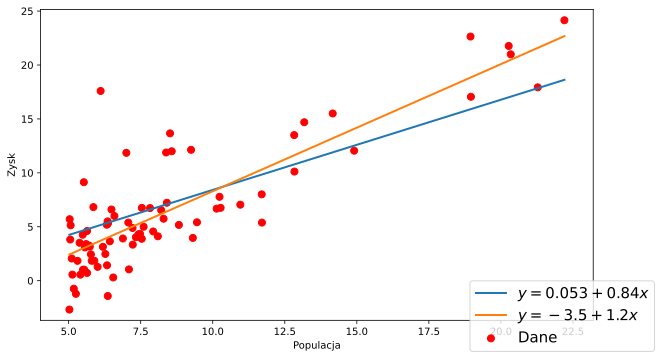

In [35]:
# Wczytwanie danych z pliku za pomocą numpy – wersja macierzowa
data = np.loadtxt('data01_train.csv', delimiter=',')
m, n_plus_1 = data.shape
n = n_plus_1 - 1
Xn = data[:, 0:n].reshape(m, n)

# Dodaj kolumnę jedynek do macierzy
XMx = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n_plus_1)
yMx = np.matrix(data[:, 1]).reshape(m, 1)

thetaStartMx = np.zeros((2, 1))

fig = regdotsMx(XMx, yMx)
theta_e1, log1 = GDMx(JMx, dJMx, thetaStartMx, XMx, yMx, alpha=0.01, eps=0.01)  # niebieska linia
reglineMx(fig, hMx, theta_e1, XMx)
theta_e2, log2 = GDMx(JMx, dJMx, thetaStartMx, XMx, yMx, alpha=0.01, eps=0.000001)  # pomarańczowa linia
reglineMx(fig, hMx, theta_e2, XMx)
legend(fig)

In [36]:
display(Math(r'\theta_{10^{-2}} = ' + LatexMatrix(theta_e1) +
             r'\quad\theta_{10^{-6}} = ' + LatexMatrix(theta_e2)))

<IPython.core.display.Math object>

### Długość kroku ($\alpha$)

In [22]:
# Jak zmienia się koszt w kolejnych krokach w zależności od alfa

def costchangeplot(logs):
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.set_xlabel('krok')
    ax.set_ylabel(r'$J(\theta)$')

    X = np.arange(0, 500, 1)
    Y = [logs[step][0] for step in X]
    ax.plot(X, Y, linewidth='2', label=(r'$J(\theta)$'))
    return fig

def slide7(alpha):
    best_theta, log = gradient_descent(h, J, [0.0, 0.0], x, y, alpha=alpha, eps=0.0001)
    fig = costchangeplot(log)
    legend(fig)

sliderAlpha1 = widgets.FloatSlider(min=0.01, max=0.03, step=0.001, value=0.02, description=r'$\alpha$', width=300)

In [23]:
widgets.interact_manual(slide7, alpha=sliderAlpha1)

interactive(children=(FloatSlider(value=0.02, description='$\\alpha$', max=0.03, min=0.01, step=0.001), Button…

<function __main__.slide7(alpha)>

## 2.7. Normalizacja danych

Normalizacja danych to proces, który polega na dostosowaniu danych wejściowych w taki sposób, żeby ułatwić działanie algorytmowi gradientu prostego.

Wyjaśnię to na przykladzie.

Użyjemy danych z „Gratka flats challenge 2017”.

Rozważmy model $h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2$, w którym cena mieszkania prognozowana jest na podstawie liczby pokoi $x_1$ i metrażu $x_2$:

In [39]:
# Wczytanie danych przy pomocy biblioteki pandas
import pandas
alldata = pandas.read_csv('data_flats.tsv', header=0, sep='\t',
                          usecols=['price', 'rooms', 'sqrMetres'])
alldata[:10]

,price,rooms,sqrMetres
0,476118.00,3,78
1,459531.00,3,62
2,411557.00,3,15
3,496416.00,4,14
4,406032.00,3,15
5,450026.00,3,80
6,571229.15,2,39
7,325000.00,3,54
8,268229.00,2,90
9,604836.00,4,40


In [40]:
# Funkcja, która pokazuje wartości minimalne i maksymalne w macierzy X

def show_mins_and_maxs(XMx):
    mins = np.amin(XMx, axis=0).tolist()[0]  # wartości minimalne
    maxs = np.amax(XMx, axis=0).tolist()[0]  # wartości maksymalne
    for i, (xmin, xmax) in enumerate(zip(mins, maxs)):
        display(Math(
            r'${:.2F} \leq x_{} \leq {:.2F}$'.format(xmin, i, xmax)))

In [41]:
# Przygotowanie danych

import numpy as np

%matplotlib inline

data2 = np.matrix(alldata[['rooms', 'sqrMetres', 'price']])

m, n_plus_1 = data2.shape
n = n_plus_1 - 1
Xn = data2[:, 0:n]

XMx2 = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n_plus_1)
yMx2 = np.matrix(data2[:, -1]).reshape(m, 1) / 1000.0

Cechy w danych treningowych przyjmują wartości z zakresu:

In [42]:
show_mins_and_maxs(XMx2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Jak widzimy, $x_2$ przyjmuje wartości dużo większe niż $x_1$.
Powoduje to, że wykres funkcji kosztu jest bardzo „spłaszczony” wzdłuż jednej z osi:

In [43]:
def contour_plot(X, y, rescale=10**8):
    theta0_vals = np.linspace(-100000, 100000, 100)
    theta1_vals = np.linspace(-100000, 100000, 100)

    J_vals = np.zeros(shape=(theta0_vals.size, theta1_vals.size))
    for t1, element in enumerate(theta0_vals):
        for t2, element2 in enumerate(theta1_vals):
            thetaT = np.matrix([1.0, element, element2]).reshape(3,1)
            J_vals[t1, t2] = JMx(thetaT, X, y) / rescale
            
    plt.figure()
    plt.contour(theta0_vals, theta1_vals, J_vals.T, np.logspace(-2, 3, 20))
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_2$')

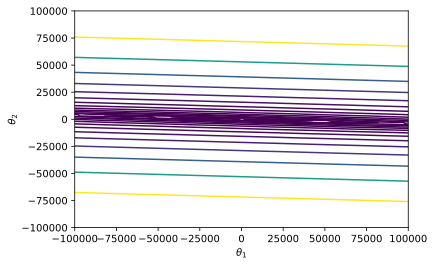

In [44]:
contour_plot(XMx2, yMx2, rescale=10**10)

Jeżeli funkcja kosztu ma kształt taki, jak na powyższym wykresie, to łatwo sobie wyobrazić, że znalezienie minimum lokalnego przy użyciu metody gradientu prostego musi stanowć nie lada wyzwanie: algorytm szybko znajdzie „rynnę”, ale „zjazd” wzdłuż „rynny” w poszukiwaniu minimum będzie odbywał się bardzo powoli.

Jak temu zaradzić?

Spróbujemy przekształcić dane tak, żeby funkcja kosztu miała „ładny”, regularny kształt.

### Skalowanie

Będziemy dążyć do tego, żeby każda z cech przyjmowała wartości w podobnym zakresie.

W tym celu przeskalujemy wartości każdej z cech, dzieląc je przez wartość maksymalną:

$$ \hat{x_i}^{(j)} := \frac{x_i^{(j)}}{\max_j x_i^{(j)}} $$

In [45]:
XMx2_scaled = XMx2 / np.amax(XMx2, axis=0)

show_mins_and_maxs(XMx2_scaled)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

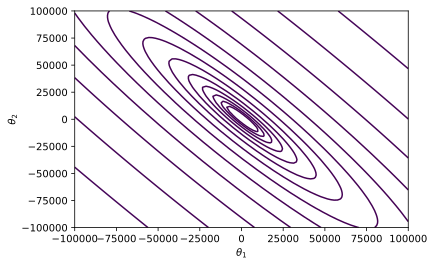

In [46]:
contour_plot(XMx2_scaled, yMx2)

### Normalizacja średniej

Będziemy dążyć do tego, żeby dodatkowo średnia wartość każdej z cech była w okolicach $0$.

W tym celu oprócz przeskalowania odejmiemy wartość średniej od wartości każdej z cech:

$$ \hat{x_i}^{(j)} := \frac{x_i^{(j)} - \mu_i}{\max_j x_i^{(j)}} $$

In [47]:
XMx2_norm = (XMx2 - np.mean(XMx2, axis=0)) / np.amax(XMx2, axis=0)

show_mins_and_maxs(XMx2_norm)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

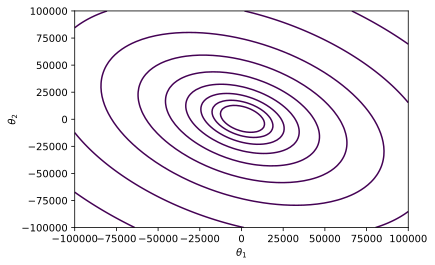

In [48]:
contour_plot(XMx2_norm, yMx2)

Teraz funkcja kosztu ma wykres o bardzo regularnym kształcie – algorytm gradientu prostego zastosowany w takim przypadku bardzo szybko znajdzie minimum funkcji kosztu.